Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Importing the datasets into python

In [2]:
Data1 = pd.read_excel("dataset_1.xlsx")
Data2 = pd.read_excel("dataset_2.xlsx")
Data3 = pd.read_excel("dataset_3.xlsx")

Inspecting and exploring the datasets

In [3]:
D1info = Data1.info()
D2info = Data2.info()
D3info = Data3.info()
D1head = Data1.head()
D2head = Data2.head()
D3head = Data3.head()
D1null = Data1.isnull().sum()
D2null = Data2.isnull().sum()
D3null = Data3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     610 non-null    int64         
 1   dteday      610 non-null    datetime64[ns]
 2   season      610 non-null    int64         
 3   yr          610 non-null    int64         
 4   mnth        610 non-null    int64         
 5   hr          610 non-null    int64         
 6   holiday     610 non-null    bool          
 7   weekday     610 non-null    int64         
 8   weathersit  610 non-null    int64         
 9   temp        610 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(7)
memory usage: 43.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  610 non-null    int64  
 1   instant 

Merging the DataFrames 

In [4]:
Data1n2 = pd.merge(Data1, Data2, on='instant')

Concatenating all the datasets

In [5]:
Data4 = pd.concat([Data1n2,Data3],axis=0)

Dropping unnecessary columns or duplicates

In [6]:
Data5 = Data4.drop("yr",axis=1)
Data5 = Data5.drop('Unnamed: 0',axis=1)

Dealing with missing values

In [7]:
Data6 = Data5.fillna(Data5['atemp'].mean())

Visualising the data

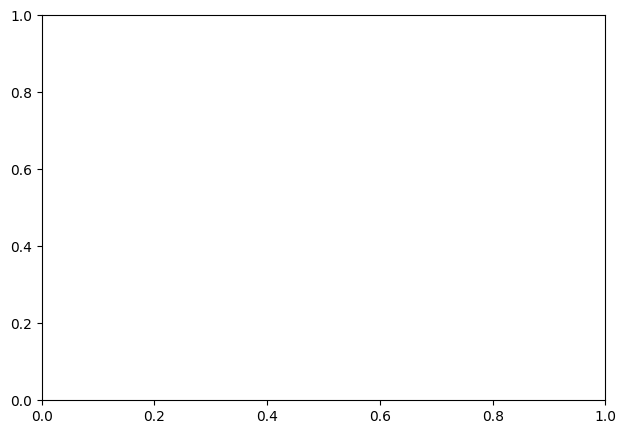

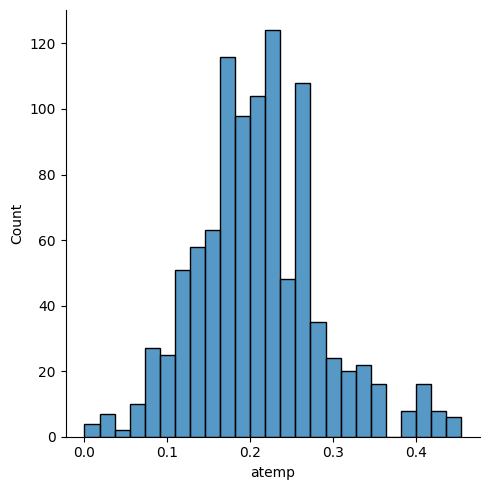

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sb.displot(Data6['atemp'])

Finding the mean and standard deviation

In [9]:
D6mean = Data6['atemp'].mean()
std_def = Data6['atemp'].std()

Setting the maximum and minimum values

In [10]:
max_val = D6mean + 3*std_def
min_val = D6mean - 3*std_def

Identifying the outliers

In [11]:
Outliers = Data6[Data6['atemp']>max_val],Data6[Data6['atemp']<min_val]

In [12]:
Data6.isnull().sum()

instant       0
dteday        0
season        0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dealing with the outliers by capping

In [13]:
Data7= pd.DataFrame(np.where(Data6['atemp']>max_val,max_val,
np.where(Data6['atemp']<min_val,min_val,Data6['atemp'])))

In [15]:
Data6['atemp']=Data7

In [16]:
Data6.to_excel('Final Dataset.xlsx')